## MODEL REGRESSION MULTIPLE

### chargement des data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import time

In [1]:
cleaned_data = pd.read_pickle('chemin/Back-End/Preprocessing/cleaned_data_cleaned_10min.pkl')
cleaned_data

NameError: name 'pd' is not defined

In [117]:
cleaned_data.shape

(2187, 34)

In [96]:
cleaned_data.columns

Index(['A_Pressure', 'A_Flow', 'A_Temperature', 'A_Level', 'B_Pressure',
       'B_Flow', 'B_Temperature', 'C_Temp_in', 'C_Temp_out',
       'C_Pressure_Drops', 'D_Flow', 'D_Pressure', 'D_Temperature',
       'E_Pressure_Drops_1', 'E_Pressure_Drops_2', 'E_Temp_in_1',
       'E_Temp_out_1', 'E_Temp_in_2', 'E_Temp_out_2', 'F_Rotation_Speed',
       'F_Flow', 'F_Pressure', 'F_Temperature', 'G_Flow', 'G_Pressure',
       'G_Temp_in', 'G_Temp_out', 'G_Pressure_Drops', 'G_Level', 'H_Voltage',
       'H_Frequency', 'H_Power_Factor', 'is_outlier', 'H_Power'],
      dtype='object')

### Étape 2 : Division des Données
Identifiez H_Power comme la variable cible et toutes les autres variables comme explicatives.

In [97]:
# Supposez que df est votre DataFrame
X = cleaned_data.drop(columns=['H_Power'])
y = cleaned_data['H_Power']


Divisez les données en ensembles d'entraînement et de test en respectant l'ordre temporel si nécessaire.

In [98]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [99]:
X_test

,A_Pressure,A_Flow,A_Temperature,A_Level,B_Pressure,B_Flow,B_Temperature,C_Temp_in,C_Temp_out,C_Pressure_Drops,...,G_Flow,G_Pressure,G_Temp_in,G_Temp_out,G_Pressure_Drops,G_Level,H_Voltage,H_Frequency,H_Power_Factor,is_outlier
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-01 10:50,1.479001,-1.942764,-0.446528,-0.222414,-1.031029,-2.086142,-1.092706,-0.832624,0.445511,0.678325,...,-0.729868,-0.047831,0.160018,-0.568013,-0.143290,-0.754127,-0.213088,-1.946957,0.814831,0.0
2023-09-01 14:10,1.745661,-2.256495,-0.944416,-0.243633,-1.454419,-2.436362,-1.627141,-0.547686,0.162795,0.628404,...,-0.729961,1.382967,0.105483,-0.699229,-0.127349,0.883133,-0.354322,0.048643,-0.606731,0.0
2023-09-01 17:30,1.775424,-2.447722,-1.028117,0.551241,-1.449469,-2.433861,-1.508831,-0.341430,0.222792,0.434191,...,0.301788,0.629870,-0.480353,-1.400744,-0.156209,0.279581,-0.354322,0.048643,-1.438225,0.0
2023-09-01 20:50,1.808601,-2.215143,-0.942895,6.161410,-1.371905,-2.361072,-1.567934,-0.203031,0.250790,0.538937,...,-0.729966,1.093793,0.751689,-0.659411,-0.153041,0.136948,-0.354322,1.049866,0.020146,0.0
2023-09-02 00:10,2.357442,-2.647950,-0.777550,0.069185,-1.392354,-2.636587,-1.569062,-0.775792,0.073027,0.552065,...,-0.729978,1.057962,-0.075300,-0.590802,-0.154230,0.941780,-0.328815,1.049866,0.853328,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31 13:59,-1.167007,0.741847,-0.093878,-1.416898,0.349418,0.783270,0.300472,1.133182,1.044628,0.150375,...,-0.729879,1.371006,0.049835,0.793202,0.322684,-0.395230,0.000000,-0.136886,0.310569,0.0
2023-10-31 17:19,-1.052565,0.630831,-0.124093,4.667625,0.080855,0.755015,-0.147045,1.002068,1.014693,0.221275,...,-0.729872,-0.113113,-0.290023,-0.636812,0.335843,0.822459,0.000000,0.960768,-0.141886,0.0
2023-10-31 20:39,-1.132124,0.707478,-0.191853,1.048829,0.416667,0.704281,0.244842,1.114715,1.072396,0.201332,...,-0.729955,1.209394,-0.099928,0.406821,0.327889,0.226002,0.000000,0.887802,-0.743640,0.0


###  Créer un modèle séquentiel

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Création du modèle
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Couche cachée avec 64 neurones
model.add(Dense(32, activation='relu'))  # Couche cachée avec 32 neurones
model.add(Dense(1))  # Couche de sortie avec 1 neurone pour régression



c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiler le modèle


In [101]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Résumer le modèle


In [102]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Mesurer le temps d'entraînement
start_time = time.time()  # Temps avant l'entraînement

###  Entraîner le modèle


In [104]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 945.9468 - val_loss: 921.5579
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 758.7003 - val_loss: 567.0948
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 440.5669 - val_loss: 188.0720
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 174.4876 - val_loss: 72.7142
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102.6855 - val_loss: 55.5913
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71.8992 - val_loss: 44.1686
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.2999 - val_loss: 37.8286
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45.4001 - val_loss: 29.8956
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.7160 - val_loss: 25.9542
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.3798 - val_loss: 23.2456
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.5185 - val_loss: 20.7588
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [105]:
end_time = time.time()  # Temps après l'entraînement
training_time = end_time - start_time  # Durée de l'entraînement

In [106]:
# Afficher la durée de l'entraînement
print('Training time is:', round(training_time, 2), 'seconds')

Training time is: 43.75 seconds


In [107]:
X

,A_Pressure,A_Flow,A_Temperature,A_Level,B_Pressure,B_Flow,B_Temperature,C_Temp_in,C_Temp_out,C_Pressure_Drops,...,G_Flow,G_Pressure,G_Temp_in,G_Temp_out,G_Pressure_Drops,G_Level,H_Voltage,H_Frequency,H_Power_Factor,is_outlier
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:01,-1.553489,1.010587,0.106665,-0.193526,0.224808,0.933800,-0.011355,-0.095542,0.527681,-0.485785,...,-0.729993,0.215095,-0.071691,-0.232752,0.343897,0.314381,0.009692,0.220973,-1.254379,0.0
2023-01-01 00:02,-1.401688,0.810276,0.136078,-0.362573,0.196064,0.917711,-0.043296,-0.087207,0.529142,-0.502610,...,-0.729946,0.171316,-0.066900,-0.181262,0.341556,-0.326769,0.010203,-0.857125,-1.146834,0.0
2023-01-01 00:18,-1.426006,0.815569,0.135540,-0.006871,0.172049,0.953800,-0.115059,-0.081115,0.530084,-0.471813,...,-0.730055,0.125018,-0.060426,-0.287548,0.343071,0.076502,0.018365,-0.918968,-1.155903,0.0
2023-01-01 03:20,-1.550818,0.687832,0.040738,0.352092,-0.113563,0.953800,-0.357319,-0.095693,0.516667,-0.492035,...,0.315079,0.116790,-0.143984,0.011856,0.342660,-0.361567,0.028276,-0.940479,0.321385,0.0
2023-01-01 06:40,-1.224655,0.833858,0.094240,-0.269261,0.062577,0.917017,-0.157910,-0.108198,0.522657,-0.469891,...,-0.729935,0.394639,-0.364089,-0.301997,0.340340,0.513062,0.162731,0.048643,-0.355166,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31 13:59,-1.167007,0.741847,-0.093878,-1.416898,0.349418,0.783270,0.300472,1.133182,1.044628,0.150375,...,-0.729879,1.371006,0.049835,0.793202,0.322684,-0.395230,0.000000,-0.136886,0.310569,0.0
2023-10-31 17:19,-1.052565,0.630831,-0.124093,4.667625,0.080855,0.755015,-0.147045,1.002068,1.014693,0.221275,...,-0.729872,-0.113113,-0.290023,-0.636812,0.335843,0.822459,0.000000,0.960768,-0.141886,0.0
2023-10-31 20:39,-1.132124,0.707478,-0.191853,1.048829,0.416667,0.704281,0.244842,1.114715,1.072396,0.201332,...,-0.729955,1.209394,-0.099928,0.406821,0.327889,0.226002,0.000000,0.887802,-0.743640,0.0


### Évaluer le modèle sur l'ensemble de test


In [108]:
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 9.040225982666016


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Metrics for MLR:
Mean Squared Error (MSE): 9.040226607197441
Root Mean Squared Error (RMSE): 3.006696959654804
Mean Absolute Error (MAE): 1.80277809839142
R-squared (R2): 0.9449290528215133


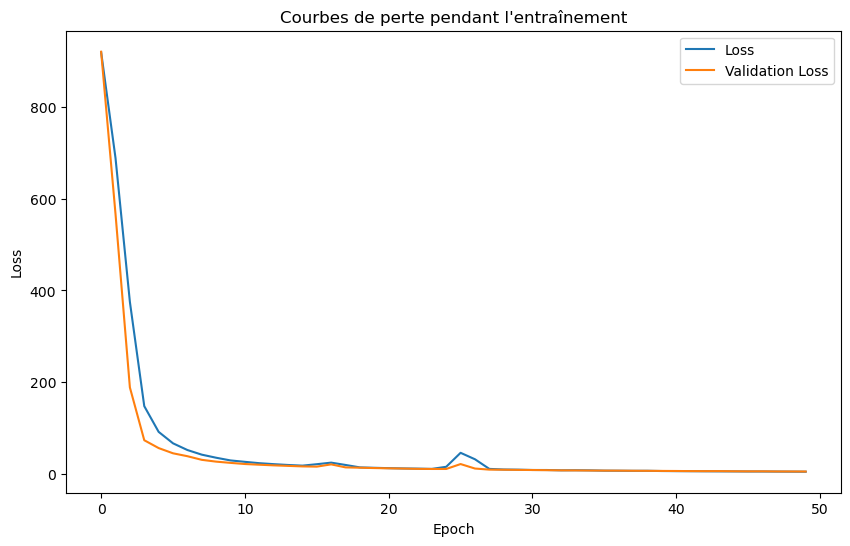

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les métriques
print("Metrics for MLR:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Visualiser l'historique de l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbes de perte pendant l\'entraînement')
plt.legend()
plt.show()

In [52]:
import numpy as np
# Extraction des paramètres du modèle
weights, biases = model.layers[0].get_weights()

# Set print options to display all elements
np.set_printoptions(threshold=np.inf)

print("Poids de la couche Dense:", weights)
print("Biais de la couche Dense:", biases)

Poids de la couche Dense: [[ 1.07955255e-01  2.70050555e-01  3.15520257e-01 -1.36747018e-01
   9.70996544e-02 -1.75907210e-01 -6.58815801e-02  3.83354694e-01
  -8.06561187e-02 -2.51640022e-01 -6.02022931e-02 -8.72428762e-04
   5.92604354e-02 -1.72817871e-01  1.11305028e-01 -1.78734213e-01
   1.42253516e-02  1.07945316e-01 -1.11720681e-01  3.08520228e-01
  -1.48535863e-01 -3.61160524e-02 -5.72238415e-02  4.84303124e-02
  -2.25316271e-01  1.81358963e-01  7.67263249e-02 -2.29216799e-01
  -6.66411370e-02  1.41793400e-01 -5.35976607e-03  2.70690531e-01
  -3.51828076e-02 -1.37406200e-01 -2.39430577e-01  5.33695295e-02
   1.33179188e-01  4.58174616e-01 -6.71470761e-02  9.24289450e-02
  -7.25632682e-02  4.92332987e-02 -1.78248376e-01 -2.23587394e-01
   1.34581223e-01 -1.15527540e-01  3.08275908e-01 -6.70754388e-02
   8.35961401e-02  1.75889015e-01 -5.60022779e-02  4.94478568e-02
   3.25664505e-02 -1.42463222e-01  9.05258581e-02  1.20666474e-01
   1.72597112e-03  1.72062322e-01  3.37245375e-01 

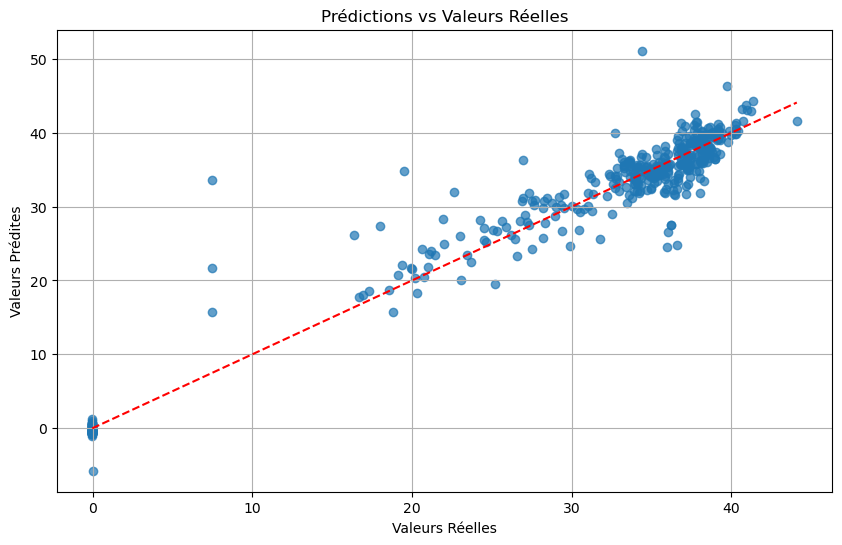

In [110]:
import matplotlib.pyplot as plt

# Visualiser les prédictions par rapport aux valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Prédictions vs Valeurs Réelles')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ligne d'identité
plt.grid(True)
plt.show()


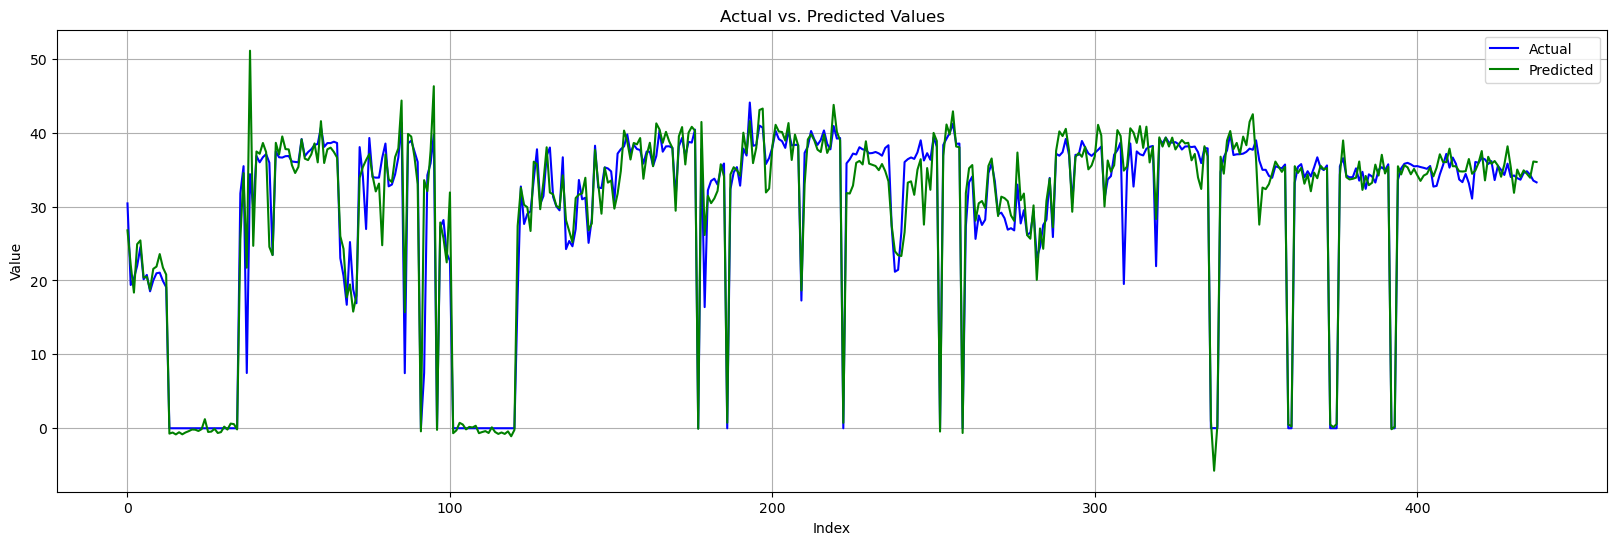

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que y_test et y_pred sont unidimensionnels
y_test_flat = np.ravel(y_test)  # ou y_test.flatten()
y_pred_flat = np.ravel(y_pred)  # ou y_pred.flatten()

# Créer un DataFrame pour les valeurs réelles et prédites
results_df = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat})

# Créer un graphique
plt.figure(figsize=(20, 6))

# Tracer les valeurs réelles
sns.lineplot(data=results_df, x=results_df.index, y='Actual', color='blue', label='Actual')

# Tracer les valeurs prédites
sns.lineplot(data=results_df, x=results_df.index, y='Predicted', color='green', label='Predicted')

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)  # Ajoute une grille pour une meilleure lisibilité
plt.show()


### Future prediction en fonction d'une date precise en prennant en compte les periode de maintenance en vue de faire de meilleur prediction

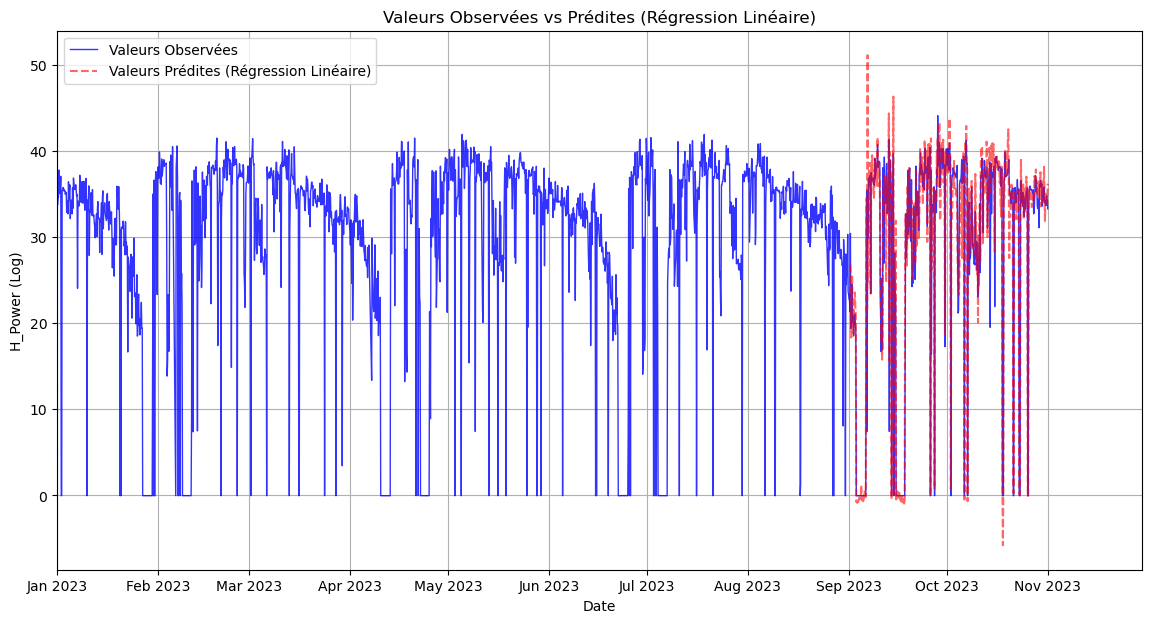

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Importer les outils pour la gestion des dates
import joblib as jb

# Assumons que y_train, y_test, et y_pred sont des tableaux ou séries temporelles
# Convertir les indices de y_train et y_test en objets datetime si ce n'est pas déjà fait
y_train.index = pd.to_datetime(y_train.index)
y_test.index = pd.to_datetime(y_test.index)

# Convertir y_pred en DataFrame avec les dates de y_test comme index
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Valeurs Prédites'])

# Créer des DataFrames pour les valeurs observées et les prédictions
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Valeurs Prédites'])
y_train_df.rename(columns={'H_Power': 'Valeurs Observées'}, inplace=True)
y_test_df.rename(columns={'H_Power': 'Valeurs Observées'}, inplace=True)
# Combiner les valeurs observées d'entraînement et de test
y_combined = pd.concat([y_train_df, y_test_df]).sort_index()

#enrregsitrement du model de regression multiple:

jb.dump(model, 'modele_regression.pkl')


# Tracer les valeurs observées et prédites avec des couleurs et styles distincts
plt.figure(figsize=(14, 7))

# Tracer les valeurs observées en bleu avec une ligne continue et plus épaisse
plt.plot(y_combined.index, y_combined['Valeurs Observées'], label='Valeurs Observées', color='blue', linewidth=1, alpha=0.8)

# Tracer les valeurs prédites en rouge avec une ligne en pointillés et opacité réduite
plt.plot(y_pred_df.index, y_pred_df['Valeurs Prédites'], label='Valeurs Prédites (Régression Linéaire)', color='red', linestyle='--', linewidth=1.5, alpha=0.6)

# Configurer les dates sur l'axe des abscisses
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-11-30'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Utiliser MonthLocator de matplotlib.dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Utiliser DateFormatter de matplotlib.dates

plt.xlabel('Date')
plt.ylabel('H_Power (Log)')
plt.title('Valeurs Observées vs Prédites (Régression Linéaire)')
plt.legend()
plt.grid(True)
plt.show()


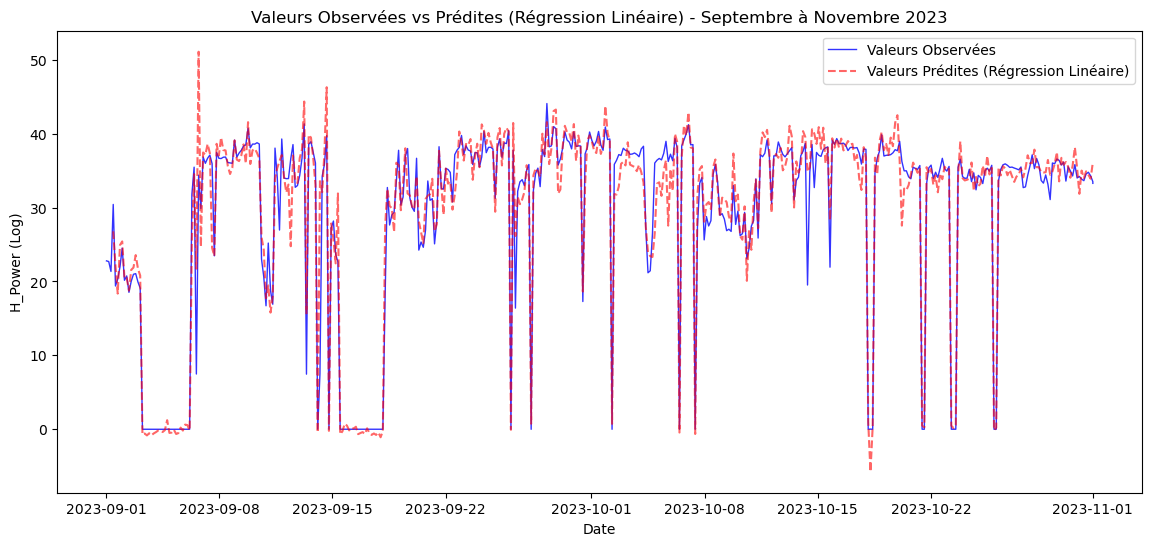

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que les indices sont bien alignés avec les dates
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Valeurs Prédites'])
y_train_df.rename(columns={'H_Power': 'Valeurs Observées'}, inplace=True)
y_test_df.rename(columns={'H_Power': 'Valeurs Observées'}, inplace=True)

# Combiner les valeurs observées d'entraînement et de test
y_combined = pd.concat([y_train_df, y_test_df]).sort_index()

# Filtrer les données pour une durée spécifique
october_start = '2023-09-01'  # Début de la période
october_end = '2023-11-01'    # Fin 

y_combined_october = y_combined.loc[october_start:october_end]
y_pred_df_october = y_pred_df.loc[october_start:october_end]

# Tracer les valeurs observées et prédites pour la période spécifique
plt.figure(figsize=(14, 6))

# Tracer les valeurs observées en bleu avec une ligne continue et plus épaisse
plt.plot(y_combined_october.index, y_combined_october['Valeurs Observées'], label='Valeurs Observées', color='blue', linewidth=1, alpha=0.8)

# Tracer les valeurs prédites en rouge avec une ligne en pointillés et opacité réduite
plt.plot(y_pred_df_october.index, y_pred_df_october['Valeurs Prédites'], label='Valeurs Prédites (Régression Linéaire)', color='red', linestyle='--', linewidth=1.5, alpha=0.6)

plt.xlabel('Date')
plt.ylabel('H_Power (Log)')
plt.title('Valeurs Observées vs Prédites (Régression Linéaire) - Septembre à Novembre 2023')
plt.legend()
plt.show()


In [114]:
import joblib
# Sauvegarder le modèle avec joblib
joblib.dump(model, 'modele_regression_lineaire.pkl')

print("Modèle sauvegardé sous 'modele_regression_lineaire.pkl'")

Modèle sauvegardé sous 'modele_regression_lineaire.pkl'


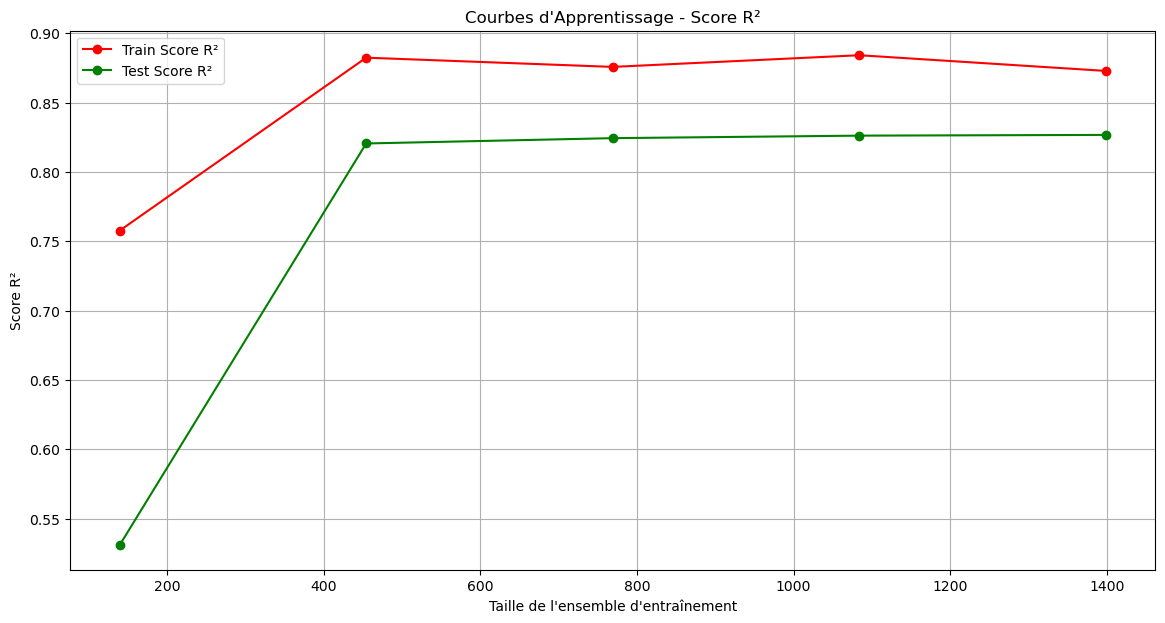

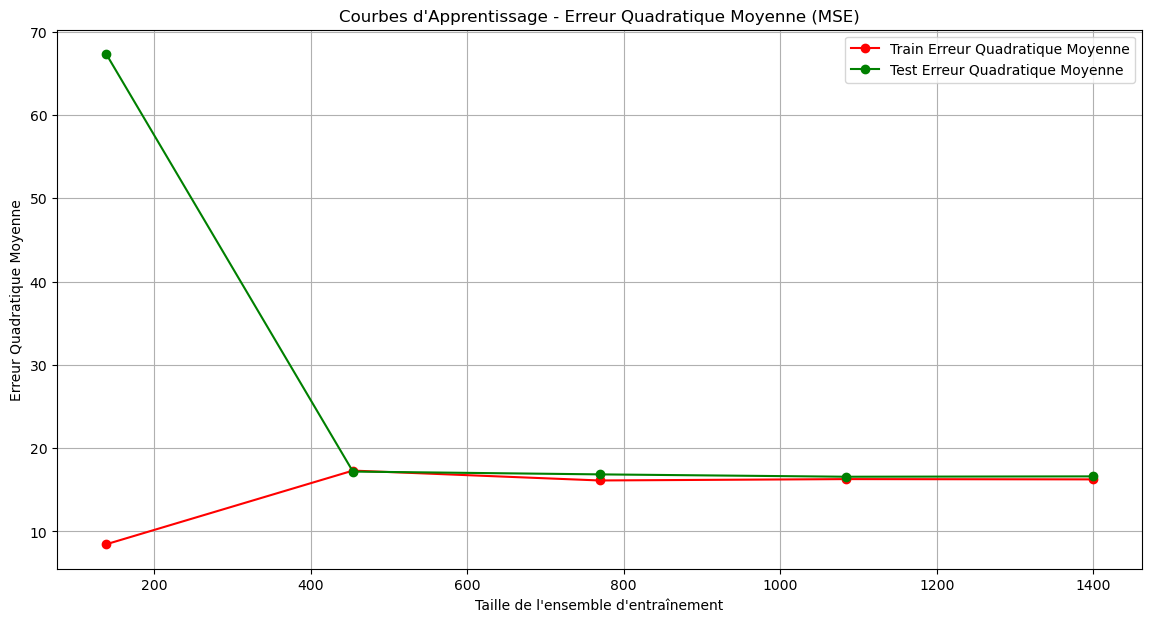

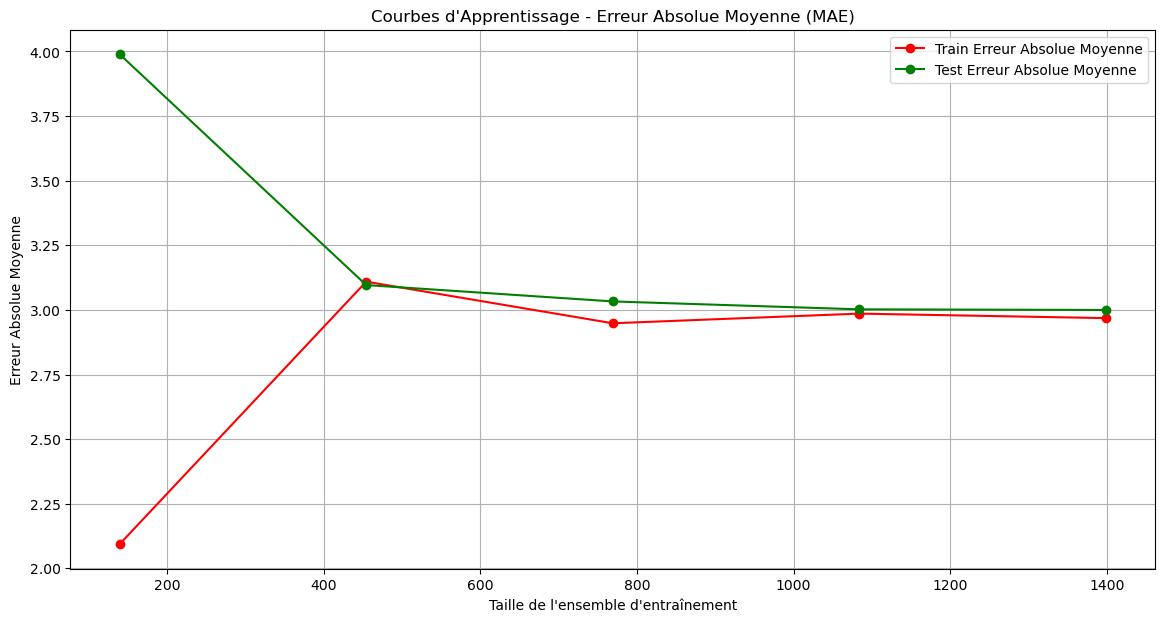

PCA + RFE - Mean Squared Error: 20.05220257045397
PCA + RFE - R-squared: 0.8778466694971346


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Supposons que cleaned_data est votre DataFrame
X = cleaned_data.drop(columns=['H_Power'])
y = cleaned_data['H_Power']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appliquer PCA pour réduire la dimensionnalité
pca = PCA(n_components=0.95)  # Conserver 95% de la variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialiser RFE avec le modèle de régression linéaire
model_rfe_pca = LinearRegression()
n_features_to_select = min(X_train_pca.shape[1], 5)  # Choisissez le nombre de caractéristiques à sélectionner
rfe = RFE(estimator=model_rfe_pca, n_features_to_select=n_features_to_select, step=1)

# Ajuster RFE sur les données d'entraînement
rfe.fit(X_train_pca, y_train)

# Obtenir les caractéristiques sélectionnées par RFE
selected_features_rfe = rfe.support_
X_train_selected_rfe = X_train_pca[:, selected_features_rfe]
X_test_selected_rfe = X_test_pca[:, selected_features_rfe]

# Fonction pour tracer les courbes d'apprentissage
def plot_learning_curve(title, train_sizes, train_scores, test_scores, metric_label, metric_name):
    plt.figure(figsize=(14, 7))
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label=f'Train {metric_label}')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label=f'Test {metric_label}')
    plt.xlabel('Taille de l\'ensemble d\'entraînement')
    plt.ylabel(metric_label)
    plt.title(f'Courbes d\'Apprentissage - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Courbes d'apprentissage pour le score R²
train_sizes_r2, train_scores_r2, test_scores_r2 = learning_curve(
    model_rfe_pca, X_train_selected_rfe, y_train, cv=5, scoring='r2'
)
plot_learning_curve('Score R²', train_sizes_r2, train_scores_r2, test_scores_r2, 'Score R²', 'R²')

# Courbes d'apprentissage pour l'erreur quadratique moyenne (MSE)
train_sizes_mse, train_scores_mse, test_scores_mse = learning_curve(
    model_rfe_pca, X_train_selected_rfe, y_train, cv=5, scoring='neg_mean_squared_error'
)
# Convertir les scores MSE en valeurs positives
train_scores_mse = -train_scores_mse
test_scores_mse = -test_scores_mse
plot_learning_curve('Erreur Quadratique Moyenne (MSE)', train_sizes_mse, train_scores_mse, test_scores_mse, 'Erreur Quadratique Moyenne', 'MSE')

# Courbes d'apprentissage pour l'erreur absolue moyenne (MAE)
train_sizes_mae, train_scores_mae, test_scores_mae = learning_curve(
    model_rfe_pca, X_train_selected_rfe, y_train, cv=5, scoring='neg_mean_absolute_error'
)
# Convertir les scores MAE en valeurs positives
train_scores_mae = -train_scores_mae
test_scores_mae = -test_scores_mae
plot_learning_curve('Erreur Absolue Moyenne (MAE)', train_sizes_mae, train_scores_mae, test_scores_mae, 'Erreur Absolue Moyenne', 'MAE')

# Entraîner et évaluer le modèle avec les caractéristiques sélectionnées par RFE
model_rfe_pca.fit(X_train_selected_rfe, y_train)
y_pred = model_rfe_pca.predict(X_test_selected_rfe)

# Évaluer le modèle
mse_rfe = mean_squared_error(y_test, y_pred)
r2_rfe = r2_score(y_test, y_pred)
print(f"PCA + RFE - Mean Squared Error: {mse_rfe}")
print(f"PCA + RFE - R-squared: {r2_rfe}")


## SOUVEGARDE DU MODEL 

In [ ]:
import joblib

# Enregistrer le modèle RFE avec PCA dans un fichier
model_filename = 'model_rfe_pca.pkl'
joblib.dump(model_rfe_pca, model_filename)

print(f"Modèle enregistré sous {model_filename}")
